In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df=pd.read_csv('Travel details dataset.csv')
df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [3]:
df.columns

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost'],
      dtype='object')

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Trip ID               139 non-null    int64  
 1   Destination           137 non-null    object 
 2   Start date            137 non-null    object 
 3   End date              137 non-null    object 
 4   Duration (days)       137 non-null    float64
 5   Traveler name         137 non-null    object 
 6   Traveler age          137 non-null    float64
 7   Traveler gender       137 non-null    object 
 8   Traveler nationality  137 non-null    object 
 9   Accommodation type    137 non-null    object 
 10  Accommodation cost    137 non-null    object 
 11  Transportation type   136 non-null    object 
 12  Transportation cost   136 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 14.2+ KB


In [6]:
df.describe()

,Trip ID,Duration (days),Traveler age
count,139.000000,137.000000,137.000000
mean,70.000000,7.605839,33.175182
std,40.269923,1.601276,7.145441
min,1.000000,5.000000,20.000000
25%,35.500000,7.000000,28.000000
50%,70.000000,7.000000,31.000000
75%,104.500000,8.000000,38.000000
max,139.000000,14.000000,60.000000


In [7]:
df.isnull().sum()

Trip ID                 0
Destination             2
Start date              2
End date                2
Duration (days)         2
Traveler name           2
Traveler age            2
Traveler gender         2
Traveler nationality    2
Accommodation type      2
Accommodation cost      2
Transportation type     3
Transportation cost     3
dtype: int64

In [8]:
df.dropna(axis=0,inplace=True)
df

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [9]:
df.drop(columns=['Trip ID','Traveler name'],inplace=True)

In [10]:
df.reset_index(drop=True, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Destination           136 non-null    object 
 1   Start date            136 non-null    object 
 2   End date              136 non-null    object 
 3   Duration (days)       136 non-null    float64
 4   Traveler age          136 non-null    float64
 5   Traveler gender       136 non-null    object 
 6   Traveler nationality  136 non-null    object 
 7   Accommodation type    136 non-null    object 
 8   Accommodation cost    136 non-null    object 
 9   Transportation type   136 non-null    object 
 10  Transportation cost   136 non-null    object 
dtypes: float64(2), object(9)
memory usage: 11.8+ KB


In [12]:
df.describe()

,Duration (days),Traveler age
count,136.000000,136.000000
mean,7.610294,33.117647
std,1.606343,7.139933
min,5.000000,20.000000
25%,7.000000,28.000000
50%,7.000000,31.000000
75%,8.000000,37.250000
max,14.000000,60.000000


In [13]:
df.columns

Index(['Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler age', 'Traveler gender', 'Traveler nationality',
       'Accommodation type', 'Accommodation cost', 'Transportation type',
       'Transportation cost'],
      dtype='object')

In [14]:
df.isna().sum()

Destination             0
Start date              0
End date                0
Duration (days)         0
Traveler age            0
Traveler gender         0
Traveler nationality    0
Accommodation type      0
Accommodation cost      0
Transportation type     0
Transportation cost     0
dtype: int64

# Feature Engineering

In [16]:
# Conversion rate (1 USD = 83 INR)
conversion_rate = 83

def convert_usd_to_inr(value):
    if isinstance(value, str):
        # Check if value contains '$' or 'USD' using regex
        if re.search(r'(\$|USD)', value):
            
            value_in_usd = int(re.sub(r'[^0-9.]', '', value))
            return value_in_usd * conversion_rate
    # If it's not a USD value (i.e., already in INR), return as is
    return value 

df['Accommodation cost'] = df['Accommodation cost'].apply(convert_usd_to_inr)
df['Transportation cost'] = df['Transportation cost'].apply(convert_usd_to_inr)
print(df)




                Destination Start date   End date  Duration (days)  \
0                London, UK   5/1/2023   5/8/2023              7.0   
1          Phuket, Thailand  6/15/2023  6/20/2023              5.0   
2           Bali, Indonesia   7/1/2023   7/8/2023              7.0   
3             New York, USA  8/15/2023  8/29/2023             14.0   
4              Tokyo, Japan  9/10/2023  9/17/2023              7.0   
..                      ...        ...        ...              ...   
131  Rio de Janeiro, Brazil   8/1/2023  8/10/2023              9.0   
132       Vancouver, Canada  8/15/2023  8/21/2023              6.0   
133       Bangkok, Thailand   9/1/2023   9/8/2023              7.0   
134        Barcelona, Spain  9/15/2023  9/22/2023              7.0   
135   Auckland, New Zealand  10/1/2023  10/8/2023              7.0   

     Traveler age Traveler gender Traveler nationality Accommodation type  \
0            35.0            Male             American              Hotel   
1    

In [17]:
df['Accommodation cost'] = pd.to_numeric(df['Accommodation cost'], errors='coerce')
df['Transportation cost'] = pd.to_numeric(df['Transportation cost'], errors='coerce')

df['Total Cost']=df['Accommodation cost']+df['Transportation cost']

In [18]:
## **Log Transformation of Total Cost**
df['Total Cost Log'] = np.log1p(df['Total Cost'])  # Log transformation is used for handle large range of value
df.head(50)

,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Total Cost,Total Cost Log
0,"London, UK",5/1/2023,5/8/2023,7.0,35.0,Male,American,Hotel,1200,Flight,600,1800,7.496097
1,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,28.0,Female,Canadian,Resort,800,Flight,500,1300,7.170888
2,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,45.0,Male,Korean,Villa,1000,Flight,700,1700,7.438972
3,"New York, USA",8/15/2023,8/29/2023,14.0,29.0,Female,British,Hotel,2000,Flight,1000,3000,8.006701
4,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,26.0,Female,Vietnamese,Airbnb,700,Train,200,900,6.803505
5,"Paris, France",10/5/2023,10/10/2023,5.0,42.0,Male,American,Hotel,1500,Flight,800,2300,7.741099
6,"Sydney, Australia",11/20/2023,11/30/2023,10.0,33.0,Female,Australian,Hostel,500,Flight,1200,1700,7.438972
7,"Rio de Janeiro, Brazil",1/5/2024,1/12/2024,7.0,25.0,Male,Brazilian,Airbnb,900,Flight,600,1500,7.313887
8,"Amsterdam, Netherlands",2/14/2024,2/21/2024,7.0,31.0,Female,Dutch,Hotel,1200,Train,200,1400,7.244942
9,"Dubai, United Arab Emirates",3/10/2024,3/17/2024,7.0,39.0,Male,Emirati,Resort,2500,Flight,800,3300,8.101981


In [19]:
df['Start date']=pd.to_datetime(df['Start date'], format='%m/%d/%Y')
df['End date']=pd.to_datetime(df['End date'], format='%m/%d/%Y')
df

,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Total Cost,Total Cost Log
0,"London, UK",2023-05-01,2023-05-08,7.0,35.0,Male,American,Hotel,1200,Flight,600,1800,7.496097
1,"Phuket, Thailand",2023-06-15,2023-06-20,5.0,28.0,Female,Canadian,Resort,800,Flight,500,1300,7.170888
2,"Bali, Indonesia",2023-07-01,2023-07-08,7.0,45.0,Male,Korean,Villa,1000,Flight,700,1700,7.438972
3,"New York, USA",2023-08-15,2023-08-29,14.0,29.0,Female,British,Hotel,2000,Flight,1000,3000,8.006701
4,"Tokyo, Japan",2023-09-10,2023-09-17,7.0,26.0,Female,Vietnamese,Airbnb,700,Train,200,900,6.803505
...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,9.0,37.0,Male,Brazilian,Hostel,2500,Car,2000,4500,8.412055
132,"Vancouver, Canada",2023-08-15,2023-08-21,6.0,29.0,Female,Canadian,Hotel,5000,Airplane,3000,8000,8.987322
133,"Bangkok, Thailand",2023-09-01,2023-09-08,7.0,34.0,Male,Chinese,Hostel,2000,Train,1000,3000,8.006701
134,"Barcelona, Spain",2023-09-15,2023-09-22,7.0,25.0,Female,Spanish,Airbnb,6000,Airplane,2500,8500,9.047939


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Destination           136 non-null    object        
 1   Start date            136 non-null    datetime64[ns]
 2   End date              136 non-null    datetime64[ns]
 3   Duration (days)       136 non-null    float64       
 4   Traveler age          136 non-null    float64       
 5   Traveler gender       136 non-null    object        
 6   Traveler nationality  136 non-null    object        
 7   Accommodation type    136 non-null    object        
 8   Accommodation cost    136 non-null    int64         
 9   Transportation type   136 non-null    object        
 10  Transportation cost   136 non-null    int64         
 11  Total Cost            136 non-null    int64         
 12  Total Cost Log        136 non-null    float64       
dtypes: datetime64[ns](2)

In [21]:
# Extract Day of the Year 
df['Start date(DOY)'] = df['Start date'].dt.dayofyear
df['End date(DOY)']=df['End date'].dt.dayofyear
df

,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Total Cost,Total Cost Log,Start date(DOY),End date(DOY)
0,"London, UK",2023-05-01,2023-05-08,7.0,35.0,Male,American,Hotel,1200,Flight,600,1800,7.496097,121,128
1,"Phuket, Thailand",2023-06-15,2023-06-20,5.0,28.0,Female,Canadian,Resort,800,Flight,500,1300,7.170888,166,171
2,"Bali, Indonesia",2023-07-01,2023-07-08,7.0,45.0,Male,Korean,Villa,1000,Flight,700,1700,7.438972,182,189
3,"New York, USA",2023-08-15,2023-08-29,14.0,29.0,Female,British,Hotel,2000,Flight,1000,3000,8.006701,227,241
4,"Tokyo, Japan",2023-09-10,2023-09-17,7.0,26.0,Female,Vietnamese,Airbnb,700,Train,200,900,6.803505,253,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,"Rio de Janeiro, Brazil",2023-08-01,2023-08-10,9.0,37.0,Male,Brazilian,Hostel,2500,Car,2000,4500,8.412055,213,222
132,"Vancouver, Canada",2023-08-15,2023-08-21,6.0,29.0,Female,Canadian,Hotel,5000,Airplane,3000,8000,8.987322,227,233
133,"Bangkok, Thailand",2023-09-01,2023-09-08,7.0,34.0,Male,Chinese,Hostel,2000,Train,1000,3000,8.006701,244,251
134,"Barcelona, Spain",2023-09-15,2023-09-22,7.0,25.0,Female,Spanish,Airbnb,6000,Airplane,2500,8500,9.047939,258,265


In [22]:
#convert categorial data into numeric

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.iloc[:,0:1]=le.fit_transform(df.iloc[:,0:1])
df.iloc[:,5:6]=le.fit_transform(df.iloc[:,5:6])
df.iloc[:,6:7]=le.fit_transform(df.iloc[:,6:7])
df


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Total Cost,Total Cost Log,Start date(DOY),End date(DOY)
0,30,2023-05-01,2023-05-08,7.0,35.0,1,0,Hotel,1200,Flight,600,1800,7.496097,121,128
1,42,2023-06-15,2023-06-20,5.0,28.0,0,7,Resort,800,Flight,500,1300,7.170888,166,171
2,6,2023-07-01,2023-07-08,7.0,45.0,1,23,Villa,1000,Flight,700,1700,7.438972,182,189
3,36,2023-08-15,2023-08-29,14.0,29.0,0,4,Hotel,2000,Flight,1000,3000,8.006701,227,241
4,57,2023-09-10,2023-09-17,7.0,26.0,0,40,Airbnb,700,Train,200,900,6.803505,253,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,44,2023-08-01,2023-08-10,9.0,37.0,1,3,Hostel,2500,Car,2000,4500,8.412055,213,222
132,58,2023-08-15,2023-08-21,6.0,29.0,0,7,Hotel,5000,Airplane,3000,8000,8.987322,227,233
133,9,2023-09-01,2023-09-08,7.0,34.0,1,9,Hostel,2000,Train,1000,3000,8.006701,244,251
134,11,2023-09-15,2023-09-22,7.0,25.0,0,33,Airbnb,6000,Airplane,2500,8500,9.047939,258,265


In [23]:
# Calculate total cost for each accommodation
df['total_cost per each Accommodation'] = df['Accommodation cost'] / df['Duration (days)']
df['total_cost per each Transportation'] = df['Transportation cost']/df['Duration (days)']

# Calculate average total cost for each accommodation type
average_total_cost = df.groupby('Accommodation type')['total_cost per each Accommodation'].mean()

# Calculate average total cost for each  Transportation type
average_total_cost1=df.groupby('Transportation type')['total_cost per each Transportation'].mean()

# Sort by average total cost in descending order
sorted_total_cost = average_total_cost.sort_values(ascending=False)
sorted_total_cost1 = average_total_cost1.sort_values(ascending=False)
sorted_total_cost1
# Encode categorical columns
df['Accommodation type'] = df['Accommodation type'].map({'Riad': 0,'Vacation rental': 1,'Hostel':2 ,'Guesthouse': 3,'Airbnb':4,'Resort':5,'Hotel':6,'Villa':7})

df['Transportation type'] = df['Transportation type'].map({'Ferry': 0, 'Subway': 1, 'Airplane': 2,'Bus':3,'Flight':4,'Train':5,'Car':6,'Car rental':7,'Plane':8})
df


,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Total Cost,Total Cost Log,Start date(DOY),End date(DOY),total_cost per each Accommodation,total_cost per each Transportation
0,30,2023-05-01,2023-05-08,7.0,35.0,1,0,6,1200,4,600,1800,7.496097,121,128,171.428571,85.714286
1,42,2023-06-15,2023-06-20,5.0,28.0,0,7,5,800,4,500,1300,7.170888,166,171,160.000000,100.000000
2,6,2023-07-01,2023-07-08,7.0,45.0,1,23,7,1000,4,700,1700,7.438972,182,189,142.857143,100.000000
3,36,2023-08-15,2023-08-29,14.0,29.0,0,4,6,2000,4,1000,3000,8.006701,227,241,142.857143,71.428571
4,57,2023-09-10,2023-09-17,7.0,26.0,0,40,4,700,5,200,900,6.803505,253,260,100.000000,28.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,44,2023-08-01,2023-08-10,9.0,37.0,1,3,2,2500,6,2000,4500,8.412055,213,222,277.777778,222.222222
132,58,2023-08-15,2023-08-21,6.0,29.0,0,7,6,5000,2,3000,8000,8.987322,227,233,833.333333,500.000000
133,9,2023-09-01,2023-09-08,7.0,34.0,1,9,2,2000,5,1000,3000,8.006701,244,251,285.714286,142.857143
134,11,2023-09-15,2023-09-22,7.0,25.0,0,33,4,6000,2,2500,8500,9.047939,258,265,857.142857,357.142857


C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\1418458102.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_total_cost.index, y=average_total_cost.values, palette="viridis")


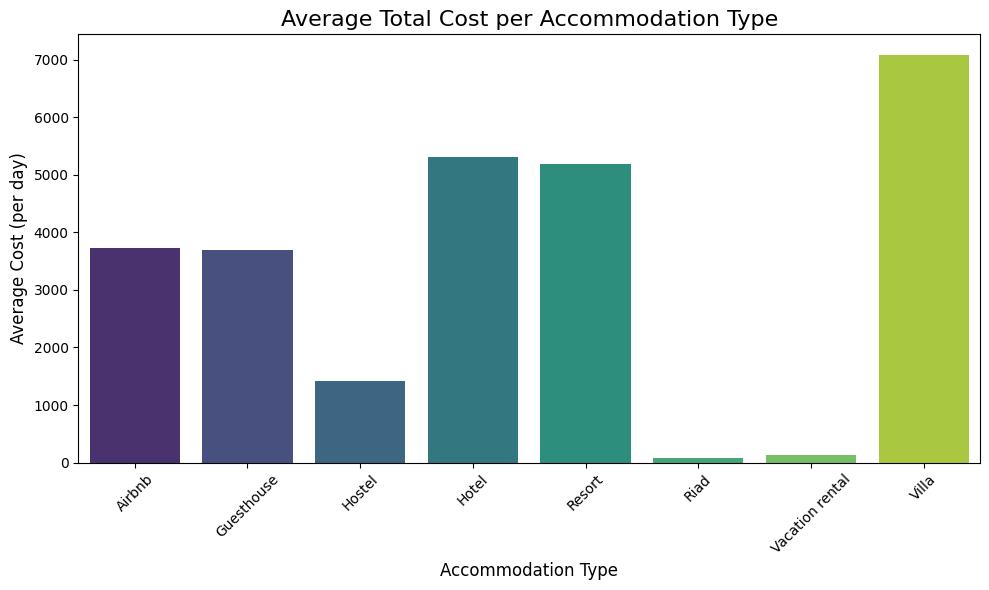

In [24]:
# Visualization: Average Total Cost per Accommodation Type
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x=average_total_cost.index, y=average_total_cost.values, palette="viridis")
plt.title("Average Total Cost per Accommodation Type", fontsize=16)
plt.xlabel("Accommodation Type", fontsize=12)
plt.ylabel("Average Cost (per day)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\4155598324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_total_cost1.index, y=average_total_cost1.values, palette="coolwarm")


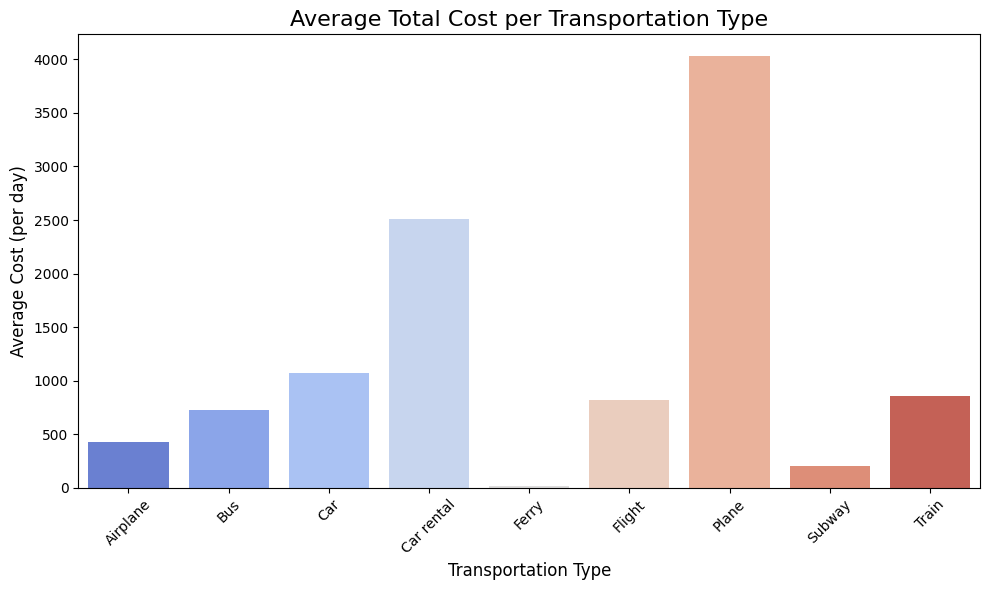

In [25]:
# Visualization: Average Total Cost per Transportation Type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_total_cost1.index, y=average_total_cost1.values, palette="coolwarm")
plt.title("Average Total Cost per Transportation Type", fontsize=16)
plt.xlabel("Transportation Type", fontsize=12)
plt.ylabel("Average Cost (per day)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\1898640022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Accommodation type', y='total_cost per each Accommodation', data=df, palette="Set3")


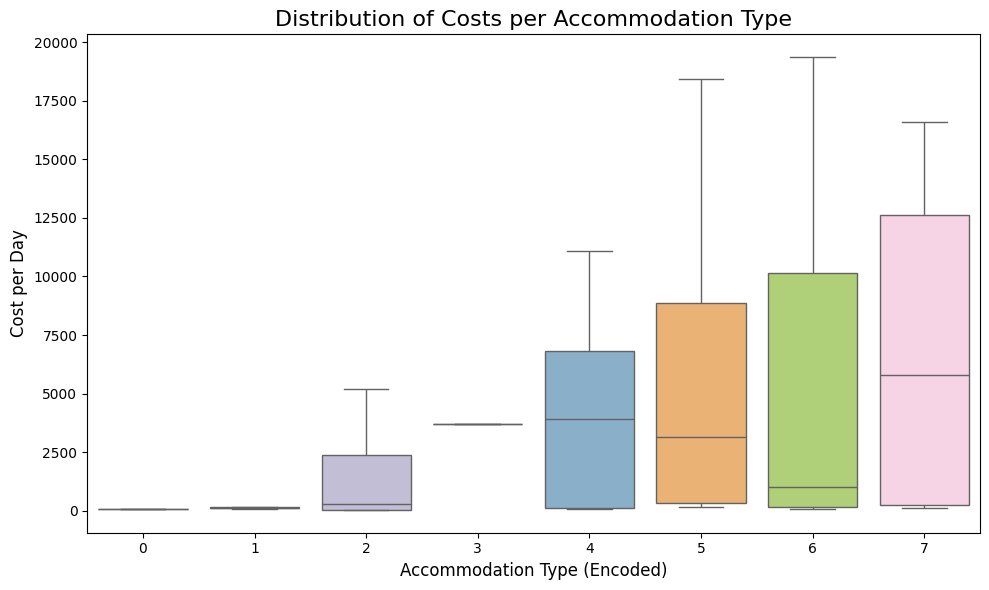

In [26]:
# Visualization: Boxplot of Costs per Accommodation Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Accommodation type', y='total_cost per each Accommodation', data=df, palette="Set3")
plt.title("Distribution of Costs per Accommodation Type", fontsize=16)
plt.xlabel("Accommodation Type (Encoded)", fontsize=12)
plt.ylabel("Cost per Day", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\2792716659.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transportation type', y='total_cost per each Transportation', data=df, palette="Set2")


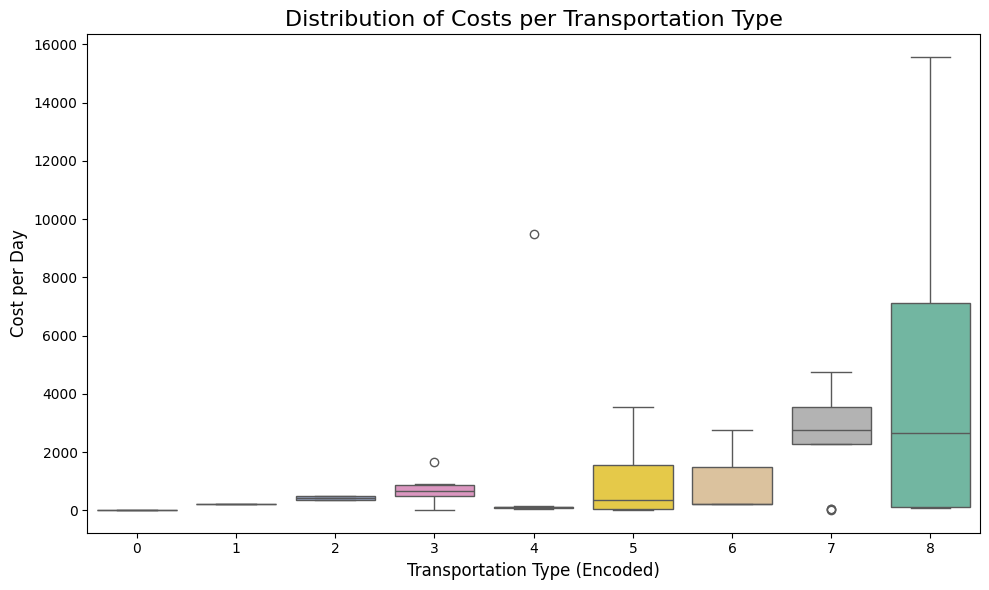

In [27]:
# Visualization: Boxplot of Costs per Transportation Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transportation type', y='total_cost per each Transportation', data=df, palette="Set2")
plt.title("Distribution of Costs per Transportation Type", fontsize=16)
plt.xlabel("Transportation Type (Encoded)", fontsize=12)
plt.ylabel("Cost per Day", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\3504244242.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transportation type', y='total_cost per each Transportation', data=df_filtered, palette="Set2")


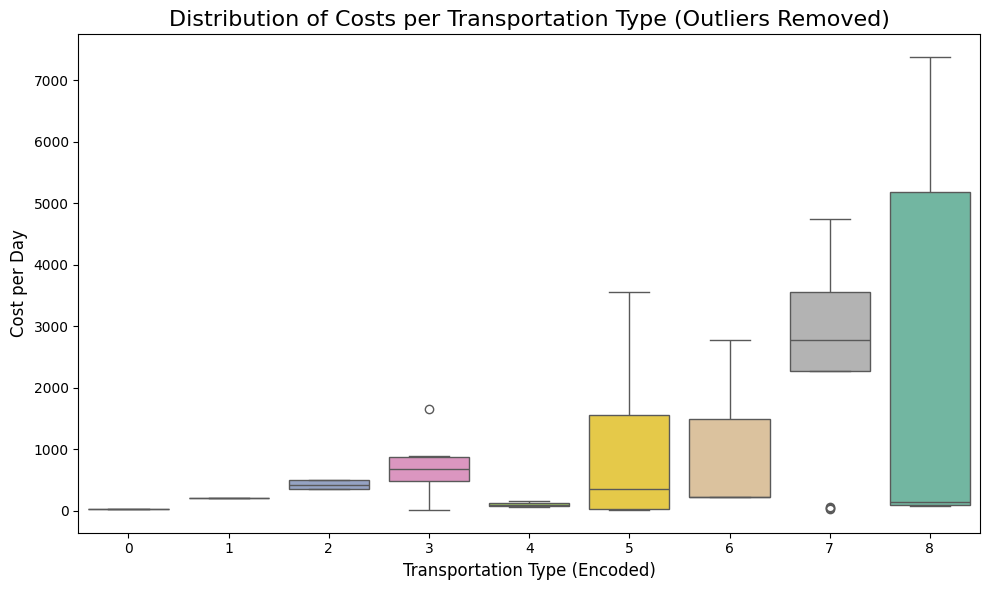

In [28]:
import numpy as np

# Calculate IQR for the 'total_cost per each Transportation'
Q1 = df['total_cost per each Transportation'].quantile(0.25)
Q3 = df['total_cost per each Transportation'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for the IQR method
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



# Filter the dataset to remove outliers
df_filtered = df[(df['total_cost per each Transportation'] >= lower_bound) & (df['total_cost per each Transportation'] <= upper_bound)]
df_filtered.reset_index(drop=True, inplace=True)
# Now plot the boxplot without the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transportation type', y='total_cost per each Transportation', data=df_filtered, palette="Set2")
plt.title("Distribution of Costs per Transportation Type (Outliers Removed)", fontsize=16)
plt.xlabel("Transportation Type (Encoded)", fontsize=12)
plt.ylabel("Cost per Day", fontsize=12)
plt.tight_layout()
plt.show()


In [29]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Destination                         123 non-null    object        
 1   Start date                          123 non-null    datetime64[ns]
 2   End date                            123 non-null    datetime64[ns]
 3   Duration (days)                     123 non-null    float64       
 4   Traveler age                        123 non-null    float64       
 5   Traveler gender                     123 non-null    object        
 6   Traveler nationality                123 non-null    object        
 7   Accommodation type                  123 non-null    int64         
 8   Accommodation cost                  123 non-null    int64         
 9   Transportation type                 123 non-null    int64         
 10  Transportation cost       

In [30]:
# Recalculate average total costs after outlier handling
average_total_cost_filtered = df_filtered.groupby('Accommodation type')['total_cost per each Accommodation'].mean()
average_total_cost1_filtered = df_filtered.groupby('Transportation type')['total_cost per each Transportation'].mean()

# Sort by average total cost
sorted_total_cost_filtered = average_total_cost_filtered.sort_values(ascending=False)
sorted_total_cost1_filtered = average_total_cost1_filtered.sort_values(ascending=False)

print(sorted_total_cost_filtered)
print(sorted_total_cost1_filtered)


Accommodation type
5    4669.810770
6    4379.392787
7    3915.584416
3    3688.888889
4    3680.995795
2    1399.462953
1     128.042328
0      85.714286
Name: total_cost per each Accommodation, dtype: float64
Transportation type
7    2513.590629
8    2178.342873
6    1070.370370
5     857.240991
3     727.913360
2     426.190476
1     207.500000
4      99.457672
0      21.428571
Name: total_cost per each Transportation, dtype: float64


C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\2251220970.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Transportation type', y='total_cost per each Transportation', data=df_filtered, palette="Set2")


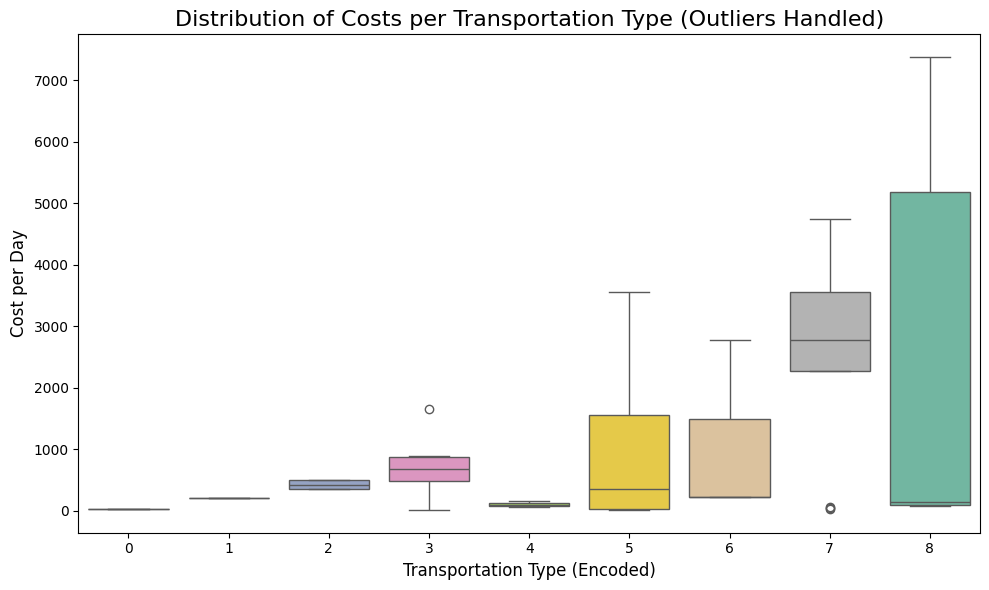

In [31]:
# Boxplot of Costs per Transportation Type (After Outlier Handling)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transportation type', y='total_cost per each Transportation', data=df_filtered, palette="Set2")
plt.title("Distribution of Costs per Transportation Type (Outliers Handled)", fontsize=16)
plt.xlabel("Transportation Type (Encoded)", fontsize=12)
plt.ylabel("Cost per Day", fontsize=12)
plt.tight_layout()
plt.show()


In [32]:
# Keep the original encoding for 'Accommodation type' and 'Transportation type'
accommodation_mapping = {
    0:'Riad', 1:'Vacation rental', 2:'Hostel', 3:'Airbnb', 4:'Guesthouse',
    5:'Villa',6: 'Hotel', 7:'Resort'
}
transportation_mapping = {
   0:'Ferry',1:'Flight', 2:'Subway',3:'Airplane',4:'Bus', 5:'Train',
    6:'Car', 7:'Plane', 8:'Car rental'
}
# Apply the encoding to the dataframe to keep the original sequence
df['Accommodation type'] = df['Accommodation type'].map(accommodation_mapping)
df['Transportation type'] = df['Transportation type'].map(transportation_mapping)

# Calculate total cost per accommodation and transportation
df['total_cost per each Accommodation'] = df['Accommodation cost'] / df['Duration (days)']
df['total_cost per each Transportation'] = df['Transportation cost'] / df['Duration (days)']

# Calculate average total cost after outlier handling
average_total_cost_filtered = df_filtered.groupby('Accommodation type')['total_cost per each Accommodation'].mean()
average_total_cost1_filtered = df_filtered.groupby('Transportation type')['total_cost per each Transportation'].mean()

# Sort by average total cost
sorted_total_cost_filtered = average_total_cost_filtered.sort_values(ascending=False)
sorted_total_cost1_filtered = average_total_cost1_filtered.sort_values(ascending=False)

# Convert indices back to original names
sorted_total_cost_filtered.index = sorted_total_cost_filtered.index.map(accommodation_mapping)
sorted_total_cost1_filtered.index = sorted_total_cost1_filtered.index.map(transportation_mapping)

# Output the sorted results with the original names
print("Sorted Average Total Cost per Accommodation Type (After Outlier Handling):")
print(sorted_total_cost_filtered)

print("Sorted Average Total Cost per Transportation Type (After Outlier Handling):")
print(sorted_total_cost1_filtered)

Sorted Average Total Cost per Accommodation Type (After Outlier Handling):
Accommodation type
Villa              4669.810770
Hotel              4379.392787
Resort             3915.584416
Airbnb             3688.888889
Guesthouse         3680.995795
Hostel             1399.462953
Vacation rental     128.042328
Riad                 85.714286
Name: total_cost per each Accommodation, dtype: float64
Sorted Average Total Cost per Transportation Type (After Outlier Handling):
Transportation type
Plane         2513.590629
Car rental    2178.342873
Car           1070.370370
Train          857.240991
Airplane       727.913360
Subway         426.190476
Flight         207.500000
Bus             99.457672
Ferry           21.428571
Name: total_cost per each Transportation, dtype: float64


C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\104376626.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_total_cost_filtered.index, y=sorted_total_cost_filtered.values, palette="viridis")


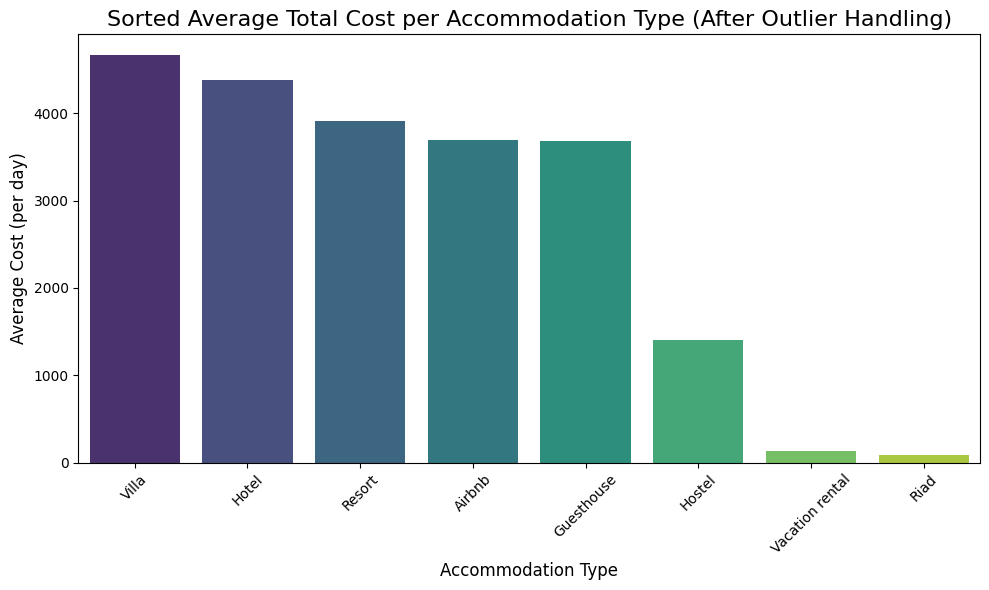

C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\104376626.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_total_cost1_filtered.index, y=sorted_total_cost1_filtered.values, palette="coolwarm")


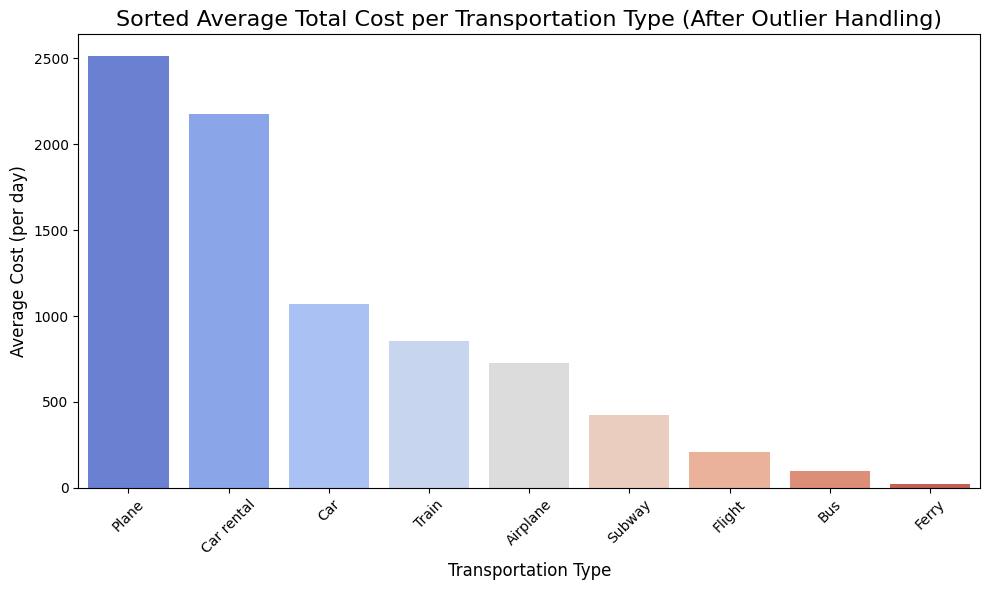

In [33]:
# Visualization: Sorted Average Total Cost per Accommodation Type (After Outlier Handling)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_total_cost_filtered.index, y=sorted_total_cost_filtered.values, palette="viridis")
plt.title("Sorted Average Total Cost per Accommodation Type (After Outlier Handling)", fontsize=16)
plt.xlabel("Accommodation Type", fontsize=12)
plt.ylabel("Average Cost (per day)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization: Sorted Average Total Cost per Transportation Type (After Outlier Handling)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_total_cost1_filtered.index, y=sorted_total_cost1_filtered.values, palette="coolwarm")
plt.title("Sorted Average Total Cost per Transportation Type (After Outlier Handling)", fontsize=16)
plt.xlabel("Transportation Type", fontsize=12)
plt.ylabel("Average Cost (per day)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


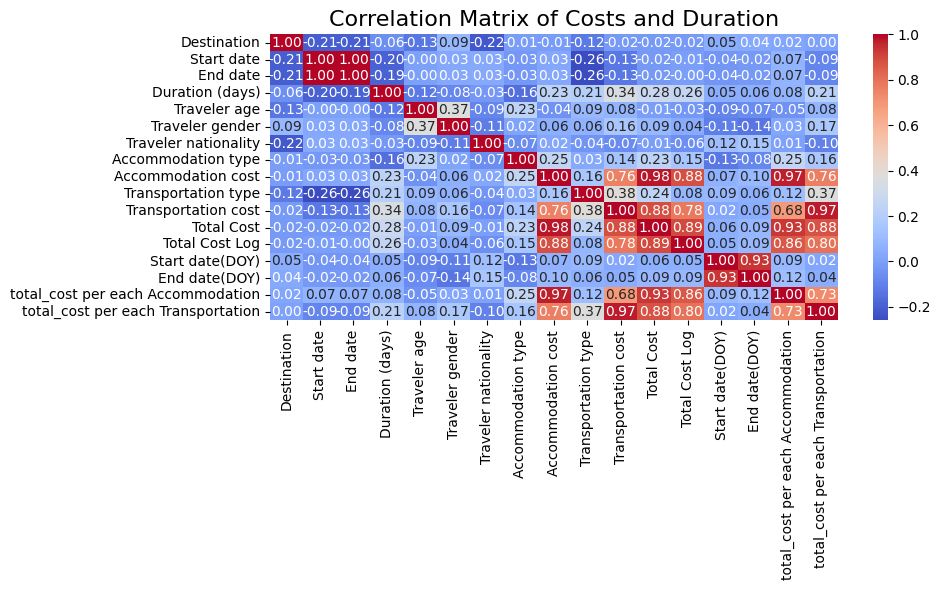

In [34]:
# Calculate correlation matrix
correlation_matrix = df_filtered.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Matrix of Costs and Duration", fontsize=16)
plt.tight_layout()
plt.show()


   total_cost per each Accommodation  total_cost per each Transportation  \
0                         171.428571                           85.714286   
1                         160.000000                          100.000000   
2                         142.857143                          100.000000   
3                         142.857143                           71.428571   
4                         100.000000                           28.571429   

   Total Cost Combined          User Class  
0           257.142857  Mid-Range Traveler  
1           260.000000  Mid-Range Traveler  
2           242.857143     Budget Traveler  
3           214.285714     Budget Traveler  
4           128.571429     Budget Traveler  


C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\2640420911.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total Cost Combined'] = df_filtered['total_cost per each Accommodation'] + df_filtered['total_cost per each Transportation']
C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\2640420911.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Total Cost Combined Log'] = np.log1p(df_filtered['Total Cost Combined'])
C:\Users\sneha\AppData\Local\Temp\ipykernel_16136\2640420911.

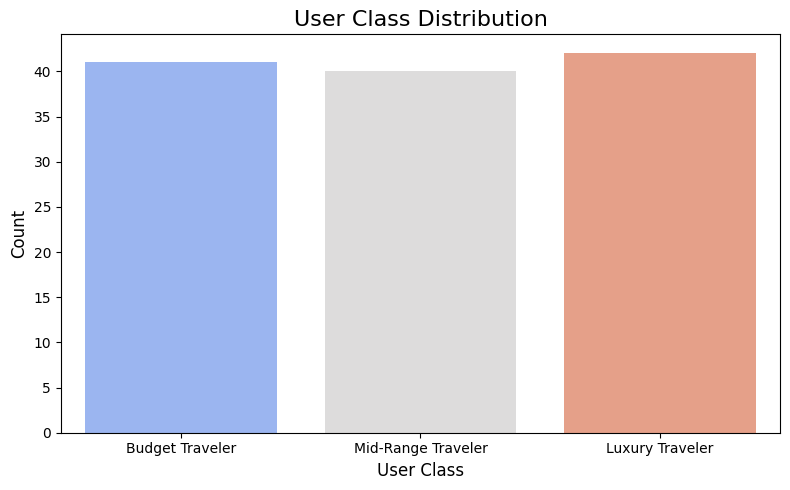

In [35]:
import numpy as np
import pandas as pd

# Assuming 'total_cost per each Accommodation' and 'total_cost per each Transportation' are already in the dataframe

# Step 1: Combine accommodation and transportation costs
df_filtered['Total Cost Combined'] = df_filtered['total_cost per each Accommodation'] + df_filtered['total_cost per each Transportation']

# Step 2: Apply log transformation (optional, for better binning if data is skewed)
df_filtered['Total Cost Combined Log'] = np.log1p(df_filtered['Total Cost Combined'])
df_filtered
# Step 3: Define bins based on the combined cost (log-transformed or raw values)
bins = [-np.inf, df_filtered['Total Cost Combined Log'].quantile(0.33), df_filtered['Total Cost Combined Log'].quantile(0.66), np.inf]

# Step 4: Assign user classes based on the bins
df_filtered['User Class'] = pd.cut(
    df_filtered['Total Cost Combined Log'], 
    bins=bins, 
    labels=['Budget Traveler', 'Mid-Range Traveler', 'Luxury Traveler'], 
    right=False
)

# Print a sample of the resulting dataframe
print(df_filtered[['total_cost per each Accommodation', 'total_cost per each Transportation', 'Total Cost Combined', 'User Class']].head())

# Visualization: Countplot for user classes
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df_filtered, x='User Class', palette='coolwarm')
plt.title('User Class Distribution', fontsize=16)
plt.xlabel('User Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()
plt.show()


In [36]:
df_filtered.head(50)

,Destination,Start date,End date,Duration (days),Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost,Total Cost,Total Cost Log,Start date(DOY),End date(DOY),total_cost per each Accommodation,total_cost per each Transportation,Total Cost Combined,Total Cost Combined Log,User Class
0,30,2023-05-01,2023-05-08,7.0,35.0,1,0,6,1200,4,600,1800,7.496097,121,128,171.428571,85.714286,257.142857,5.553513,Mid-Range Traveler
1,42,2023-06-15,2023-06-20,5.0,28.0,0,7,5,800,4,500,1300,7.170888,166,171,160.000000,100.000000,260.000000,5.564520,Mid-Range Traveler
2,6,2023-07-01,2023-07-08,7.0,45.0,1,23,7,1000,4,700,1700,7.438972,182,189,142.857143,100.000000,242.857143,5.496583,Budget Traveler
3,36,2023-08-15,2023-08-29,14.0,29.0,0,4,6,2000,4,1000,3000,8.006701,227,241,142.857143,71.428571,214.285714,5.371966,Budget Traveler
4,57,2023-09-10,2023-09-17,7.0,26.0,0,40,4,700,5,200,900,6.803505,253,260,100.000000,28.571429,128.571429,4.864232,Budget Traveler
5,38,2023-10-05,2023-10-10,5.0,42.0,1,0,6,1500,4,800,2300,7.741099,278,283,300.000000,160.000000,460.000000,6.133398,Mid-Range Traveler
6,54,2023-11-20,2023-11-30,10.0,33.0,0,1,2,500,4,1200,1700,7.438972,324,334,50.000000,120.000000,170.000000,5.141664,Budget Traveler
7,44,2024-01-05,2024-01-12,7.0,25.0,1,3,4,900,4,600,1500,7.313887,5,12,128.571429,85.714286,214.285714,5.371966,Budget Traveler
8,1,2024-02-14,2024-02-21,7.0,31.0,0,10,6,1200,5,200,1400,7.244942,45,52,171.428571,28.571429,200.000000,5.303305,Budget Traveler
9,20,2024-03-10,2024-03-17,7.0,39.0,1,11,5,2500,4,800,3300,8.101981,70,77,357.142857,114.285714,471.428571,6.157887,Mid-Range Traveler


In [37]:
df_filtered["User Class"].value_counts().sum()

123

In [38]:
##Split Data into Features and Target
X = df_filtered[['total_cost per each Accommodation','total_cost per each Transportation','Total Cost Combined Log','Duration (days)','Accommodation type','Transportation type']]
y=df_filtered['User Class']

# Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(98, 6)

In [42]:
X_test.shape

(25, 6)

In [43]:
y_train.shape

(98,)

In [44]:
y_test.shape

(25,)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=42)
log_reg.fit(X_train, y_train)


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [46]:
y_pred1 = log_reg.predict(X_test)
df1=pd.DataFrame({'Actual':y_test,'predicted':y_pred1})
df1

,Actual,predicted
18,Luxury Traveler,Luxury Traveler
45,Mid-Range Traveler,Mid-Range Traveler
47,Budget Traveler,Budget Traveler
89,Luxury Traveler,Luxury Traveler
4,Budget Traveler,Budget Traveler
40,Budget Traveler,Budget Traveler
62,Mid-Range Traveler,Mid-Range Traveler
100,Budget Traveler,Budget Traveler
31,Mid-Range Traveler,Mid-Range Traveler
55,Luxury Traveler,Luxury Traveler


In [47]:
print("Classification Report:\n", classification_report(y_test, y_pred1))
print("confusion_matrix:\n" ,  confusion_matrix(y_test, y_pred1))
print("Accuracy Score:", accuracy_score(y_test, y_pred1) * 100, "%")


Classification Report:
                     precision    recall  f1-score   support

   Budget Traveler       0.90      1.00      0.95         9
   Luxury Traveler       0.88      1.00      0.93         7
Mid-Range Traveler       1.00      0.78      0.88         9

          accuracy                           0.92        25
         macro avg       0.92      0.93      0.92        25
      weighted avg       0.93      0.92      0.92        25

confusion_matrix:
 [[9 0 0]
 [0 7 0]
 [1 1 7]]
Accuracy Score: 92.0 %


In [48]:
new_person=np.array([16600,2075,9.834995,6,6,5])
y_pred1=log_reg.predict([new_person])
print(y_pred1)

['Luxury Traveler']


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Decision Tree Classifier

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=5,min_samples_split=10,random_state=0)
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=0)

In [52]:
y_pred2 = dt_clf.predict(X_test)

In [53]:
df2=pd.DataFrame({'Actual':y_test,'predicted':y_pred2})
df2

,Actual,predicted
85,Luxury Traveler,Mid-Range Traveler
98,Budget Traveler,Budget Traveler
10,Budget Traveler,Budget Traveler
71,Luxury Traveler,Luxury Traveler
8,Budget Traveler,Budget Traveler
45,Mid-Range Traveler,Mid-Range Traveler
22,Luxury Traveler,Luxury Traveler
7,Budget Traveler,Budget Traveler
61,Budget Traveler,Budget Traveler
91,Budget Traveler,Budget Traveler


In [54]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print("Classification Report:\n", classification_report(y_test, y_pred2))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred2))
print("Accuracy Score:", accuracy_score(y_test, y_pred2) * 100, "%")

Classification Report:
                     precision    recall  f1-score   support

   Budget Traveler       1.00      1.00      1.00        11
   Luxury Traveler       1.00      0.89      0.94         9
Mid-Range Traveler       0.83      1.00      0.91         5

          accuracy                           0.96        25
         macro avg       0.94      0.96      0.95        25
      weighted avg       0.97      0.96      0.96        25

Confusion Matrix:
 [[11  0  0]
 [ 0  8  1]
 [ 0  0  5]]
Accuracy Score: 96.0 %


In [55]:
new_person=np.array([16600,2075,9.834995,6,6,5])
y_pred2=dt_clf.predict([new_person])
print(y_pred2)

['Luxury Traveler']


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Random Forest Classifier 

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [58]:
X_train.shape

(86, 6)

In [59]:
X_test.shape

(37, 6)

In [60]:
y_train.shape

(86,)

In [61]:
y_test.shape

(37,)

In [62]:
##Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=20,random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=42)

In [63]:
##Model Predictions
y_pred3 = rf_clf.predict(X_test)
y_pred3

array(['Luxury Traveler', 'Mid-Range Traveler', 'Budget Traveler',
       'Luxury Traveler', 'Budget Traveler', 'Budget Traveler',
       'Mid-Range Traveler', 'Budget Traveler', 'Mid-Range Traveler',
       'Luxury Traveler', 'Mid-Range Traveler', 'Luxury Traveler',
       'Budget Traveler', 'Budget Traveler', 'Mid-Range Traveler',
       'Budget Traveler', 'Luxury Traveler', 'Mid-Range Traveler',
       'Mid-Range Traveler', 'Budget Traveler', 'Luxury Traveler',
       'Budget Traveler', 'Mid-Range Traveler', 'Budget Traveler',
       'Luxury Traveler', 'Mid-Range Traveler', 'Mid-Range Traveler',
       'Budget Traveler', 'Luxury Traveler', 'Mid-Range Traveler',
       'Mid-Range Traveler', 'Budget Traveler', 'Luxury Traveler',
       'Luxury Traveler', 'Mid-Range Traveler', 'Mid-Range Traveler',
       'Luxury Traveler'], dtype=object)

In [64]:
df3=pd.DataFrame({'Actual':y_test,'predicted':y_pred3})
df3

,Actual,predicted
18,Luxury Traveler,Luxury Traveler
45,Mid-Range Traveler,Mid-Range Traveler
47,Budget Traveler,Budget Traveler
89,Luxury Traveler,Luxury Traveler
4,Budget Traveler,Budget Traveler
40,Budget Traveler,Budget Traveler
62,Mid-Range Traveler,Mid-Range Traveler
100,Budget Traveler,Budget Traveler
31,Mid-Range Traveler,Mid-Range Traveler
55,Luxury Traveler,Luxury Traveler


In [65]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


print("classification_report:\n",classification_report(y_test, y_pred3))
print("confusion_matrix:\n\n" ,  confusion_matrix(y_test, y_pred3))
print("accuracy_score:\n",accuracy_score(y_test,y_pred3)*100,"%")


classification_report:
                     precision    recall  f1-score   support

   Budget Traveler       0.92      1.00      0.96        11
   Luxury Traveler       1.00      1.00      1.00        11
Mid-Range Traveler       1.00      0.93      0.97        15

          accuracy                           0.97        37
         macro avg       0.97      0.98      0.97        37
      weighted avg       0.98      0.97      0.97        37

confusion_matrix:

 [[11  0  0]
 [ 0 11  0]
 [ 1  0 14]]
accuracy_score:
 97.2972972972973 %


In [66]:
new_person=np.array([100.000000	,28.571429,4.86,7,2,5])
y_pred3=rf_clf.predict([new_person])
print(y_pred3)

['Budget Traveler']


C:\Users\sneha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [67]:
#100.000000	,28.571429,4.86,7,2,5   budget

In [68]:
#16600,2075,9.834995,6,6,5 luxury

In [137]:
df_filtered.to_csv("Updated data.csv",index=False)